In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb'

array([], dtype=float64)

array([-0.4073+1.11700793j, -0.4073-1.11700793j, -0.8146+0.j        ])

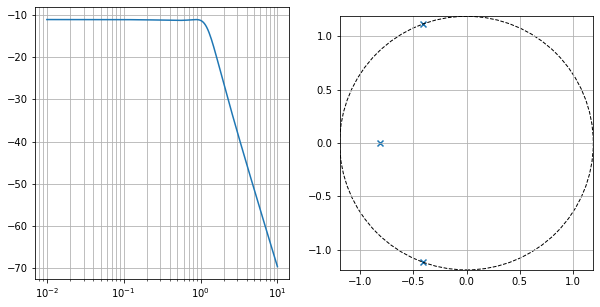

In [2]:
# Analog
## A.1
num = [0.324]
#find the den
#s = sp.symbols("s")
#expLower = ((s+0.8146)*(s**2+0.8146*s+1.4136)).expand()
#display(expLower)
den = [1, 1.6292, 2.07717316, 1.15151856]

tf = signal.TransferFunction(num, den)
display(tf.zeros)
display(tf.poles)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilter(ax[0], num, den, "")
simplezplane(ax[1], num, den, "")


In [3]:
## A.2
c = 8*10**(-9)
w0 = 2*sp.pi*1*10**3
Q = 4

# a)
#u = sp.symbols("u")
#sp.solve(sp.Eq(w0/Q, (2-u/3)*(1/(r*c))), u)
r = sp.sqrt(2/(3*w0**2*c**2)).evalf()
u = -3*((w0*r*c)/(Q)-2)
display(r, u.evalf())

# b)
#G, w0, Q, s = sp.symbols("G w0 Q s")
#exp = ((w0/Q)*s)/(s**2+w0/Q*s+w0**2)
s = sp.symbols("s")
exp = (u/(3*r*c)*s)/(s**2+(2-u/3)*(1/(r*c))*s+2/(3*r**2*c**2))
gain = exp.subs({s: 1j*w0}).simplify().evalf()
gaindb = (20*sp.log(abs(gain), 10)).evalf()
display(gain, gaindb)

## b)
display("b")
display((u/(2-u/3)))
w0, Q, r, c , u = sp.symbols("w0 Q r c u")
Q = sp.solve(sp.Eq(w0/Q, (2-u/3)*(1/(r*c))), Q)[0]
display(Q)
Q = (2-u/3)
calcSensitivity(u,Q)


16243.6833590349

5.38762756430421

8.79795897113272 + 1.62593696612155e-15*I

18.8876386466741

'b'

15.3905979619424*(6 - 0.194924200308419*pi)/pi

-3*c*r*w0/(u - 6)

-u/(3*(2 - u/3))

In [147]:
## A.3
Omega1 = 2*sp.pi*1000
Omega2 = 2*sp.pi*1500
Omega0 = sp.sqrt(Omega1*Omega2)
B = Omega2-Omega1
display(Omega1, Omega2, Omega0.evalf(), B)

w1 = abs((Omega0**2-Omega1**2)/(Omega1*B))
display(w1)


2000*pi

3000*pi

7695.29898097118

1000*pi

1

In [49]:
# Digital
## B.1
OmegaC = 2*sp.pi*800
fs = 6.4*10**3
s = sp.symbols("s")


wc = OmegaC/fs
display(wc)
# prewrap
Td = 1/fs
OmegaCWrap = (2/Td)*sp.tan(wc/2)
OmegaCWrap = OmegaCWrap.evalf()
display("Wrap", OmegaCWrap)

# bilinear transformation
z, OmC = sp.symbols("z Omega_c")
s = (2/Td)*((z-1)/(z+1))
OmC = OmegaCWrap
exp = (2*OmC)/(s+OmC)
display(exp.simplify())
display(exp.simplify().factor().evalf(4))

# verify
display("verify")
f = 1300
w = 2*sp.pi*(f/fs)
display(w)
expGain = exp.subs({z: sp.exp(1j*w)})
expGaindb = (20*sp.log(abs(expGain), 10)).evalf()
display(abs(expGain).evalf())
display(abs(expGaindb))

# 
display("test")
f = sp.symbols("f")
w = 2*sp.pi*(f/fs)
display(abs(exp.subs({z: sp.exp(1j*w)}).evalf()))
sp.solve(sp.Eq(exp.subs({z: sp.exp(1j*w)}), 1), f)


0.25*pi

'Wrap'

5301.93359837562

10603.8671967512*(z + 1)/(18101.9335983756*z - 7498.06640162438)

0.5858*(z + 1.0)/(1.0*z - 0.4142)

'verify'

0.40625*pi

0.975215305512361 - 8.7326169236472e-31*I

0.217989826066681

'test'

10603.8671967512*Abs(1/(12800.0*(exp(0.0003125*I*pi*f) - 1.0)/(exp(0.0003125*I*pi*f) + 1.0) + 5301.93359837562))

[-897.759763742681*I]

In [6]:
## B.2

array([ 1. , -1. ,  0.5])

array([1., 0., 0.])

1.0*(1.0*z**2 - 1.0*z + 0.5)

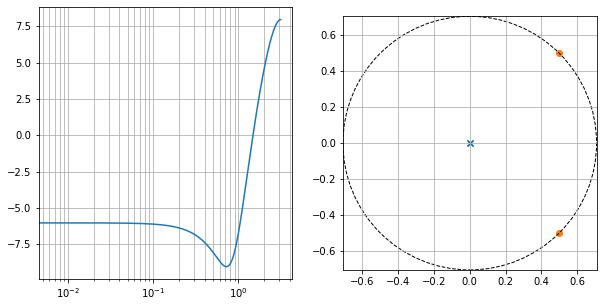

In [135]:
## B.3
zeros = [
    0.5+0.5j,
    0.5-0.5j,
]
poles = [0,0]

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
b, a = signal.zpk2tf(zeros, poles, 1)
display(b,a)
plotFilterDigital(ax[0], b, a, "")
simplezplane(ax[1], b, a, "")

z = sp.symbols("z")
(z**2-1*z**1+0.5).factor()

In [50]:
# Spectral

In [148]:
## C.2
w = sp.pi/2
w0 = sp.pi/4
N = 1000

expTop = 1-sp.exp(-1j*(w-w0)*N)
expBut = 1-sp.exp(-1j*(w-w0))
exp = expTop/expBut



display(abs(exp.evalf()))

# new
k, N, w0 = sp.symbols("k N w0")
N = 1000
w0 = sp.pi/4

k1 = sp.solve(sp.Eq(((2*sp.pi*k/N)), 2/sp.pi), k)[0]
k2 = sp.solve(sp.Eq(((2*sp.pi*k/N)-w0), 2/sp.pi), k)[0]
display("Ks", k1.evalf(), k2.evalf())

k = k2
N = 1000
w0 = sp.pi/4
#k, N, w0 = sp.symbols("k N w0")
expTop = 1-sp.exp(-1j*(2*sp.pi*k/N-w0)*N)
expBut = 1-sp.exp(-1j*(2*sp.pi*k/N-w0))
exp = expTop/expBut
display(abs(exp.evalf()))

0.e-131

'Ks'

101.321183642338

226.321183642338

2.70421047394132

In [165]:
## C.3
k = sp.symbols("k")
N = sp.symbols("N")
sp.arg(sp.exp(-1j*(2*sp.pi*k*N/16)/N)).rewrite(sp.cos).simplify()

arg(exp(-I*pi*k/8))